In [1]:
# Importing the required modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
# modules for model
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Natural Language Toolkit (NLTK)
# The RegexpTokenizer is a class that is used to split text into tokens based on a regular expression pattern. 
# It is particularly useful when you need to split text into tokens that are not separated by whitespace or other common delimiters.
from nltk.tokenize import RegexpTokenizer
# The SnowballStemmer is a class that provides an implementation of the Snowball stemming algorithm. Stemming is the process of reducing 
# a word to its base or root form, which can be useful for tasks such as text classification, information retrieval, and information extraction.
from nltk.stem.snowball import SnowballStemmer
# CountVectorizer is a module in Python's scikit-learn library, which is a powerful package for machine learning tasks. It is used to convert a collection of 
# text documents into a matrix of token counts, which can then be used to train machine learning models for text classification, clustering, and other tasks.
from sklearn.feature_extraction.text import CountVectorizer   
import pickle # it is used for serializing and de-serializing Python objects
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df=pd.read_csv("/content/phishing_site_urls.csv")
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
df.shape

(549346, 2)

# New section

In [4]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
df.duplicated().sum()

42150

In [6]:
df.drop_duplicates(inplace=True) #dropping the duplicates from dataframe
df.shape

(507196, 2)

In [7]:
df.reset_index(drop=True) #reseting the index number

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
507191,23.227.196.215/,bad
507192,apple-checker.org/,bad
507193,apple-iclods.org/,bad
507194,apple-uptoday.org/,bad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507196 entries, 0 to 516470
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     507196 non-null  object
 1   Label   507196 non-null  object
dtypes: object(2)
memory usage: 11.6+ MB


In [9]:
df.describe(include='object') # summarizes the descriptive statistics for the columns in the DataFrame that contain string or categorical data.

,URL,Label
count,507196,507196
unique,507195,2
top,tommyhumphreys.com/,good
freq,2,392897


In [10]:
df['Label'].value_counts() #It is almost seems to balanced.

good    392897
bad     114299
Name: Label, dtype: int64

In [11]:
import nltk
nltk.download('stopwords')

# This code downloads the stopwords corpus from the Natural Language Toolkit (nltk) library. 
# The stopwords corpus contains a collection of common words like "the", "and", "a", etc. that are typically removed from text 
# when performing natural language processing tasks such as text classification or sentiment analysis. 
# Once downloaded, the stopwords can be used to filter out these common words from text data.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))
sw=list(set(stopwords.words("english")))

# The code imports the Natural Language Toolkit (nltk) library and specifically imports the stopwords corpus from it. 
# It then prints a list of English stopwords and creates a new list called "sw" that contains the same stopwords without any duplicates.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
df['clean_url']=df.URL.astype(str)
df.head()

# This code adds a new column to a Pandas DataFrame called "clean_url".
# The new column is created by converting the "URL" column in the DataFrame "df" to a string data type using the "astype()" method. 

,URL,Label,clean_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,mail.printakid.com/www.online.americanexpress....,bad,mail.printakid.com/www.online.americanexpress....
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydregs.com/wp-content/themes/widescre...


In [14]:
from nltk.tokenize import RegexpTokenizer
tok= RegexpTokenizer(r'[A-Za-z0-9]+') # alphanumeric characters

# first create a new instance of the RegexpTokenizer class called "tok".
# The tokenizer is created using a regular expression pattern (r'[A-Za-z0-9]+') that matches any sequence of alphanumeric characters (letters and numbers) in a string of text.

In [15]:
df.clean_url=df.clean_url.map(lambda x: tok.tokenize(x))

# The lambda function takes each element "x" in the "clean_url" column and applies the "tok.tokenize()" method to it,
# which splits the string into a list of tokens based on the regular expression pattern specified when creating the "tok" tokenizer. 
# The resulting list of tokens is then assigned back to the "clean_url" column in the DataFrame "df".

In [16]:
from nltk.stem import WordNetLemmatizer # provides a way to convert words to their base or dictionary form, which is known as a lemma. 
from sklearn.feature_extraction.text import TfidfVectorizer #Term Frequency-Inverse Document Frequency:: It is used to convert text data into a numerical representation that can be used for machine learning algorithms.
from sklearn.feature_extraction.text import CountVectorizer  

In [17]:
nltk.download('wordnet')

# The code nltk.download('wordnet') downloads the WordNet database from the Natural Language Toolkit (NLTK) library.
# WordNet is a large lexical database of English words, which includes information about synonyms, antonyms, and semantic relationships between words. 

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
wnl = WordNetLemmatizer()
df['lem_url'] = df['clean_url'].map(lambda x: [wnl.lemmatize(word) for word in x]) 
# It applies the lemmatization process to each word in the 'clean_url' column of the pandas dataframe df, using a lambda function.
df.head()

,URL,Label,clean_url,lem_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737...","[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydregs, com, wp, content, theme, wid..."


In [19]:
df.isna().sum()

URL          0
Label        0
clean_url    0
lem_url      0
dtype: int64

In [20]:
# Creation of a binary bag-of-words representation from text data using TF-IDF vectorization
word_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features =1000) 
unigramdataGet= word_vectorizer.fit_transform(df['lem_url'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
x=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
x[x>0] = 1



# line-1: It creates an instance of the TfidfVectorizer class with the parameters ngram_range set to (1,1) (i.e., unigrams-single words only) 
#         and max_features set to 1000 (i.e., only the top 1000 features will be kept based on their TF-IDF scores).
# line-2: It applies the word_vectorizer to the 'lem_url' column of the df pandas DataFrame, which contains preprocessed URLs. 
#         The fit_transform() method converts the URLs into a TF-IDF matrix of features.
# line-3: Converts the sparse matrix unigramdataGet to a dense matrix.
# line-4: Retrieves the vocabulary of the word_vectorizer, i.e., the feature names of the top 1000 features.
# line-5: Creates a new pandas DataFrame x from the dense matrix unigramdataGet, using the feature names in vocab.
# line-6: It replaces all values in x that are greater than 0 with 1. This step effectively converts the TF-IDF matrix into a binary matrix, 
#         where a 1 indicates the presence of a feature in a URL, and a 0 indicates its absence.

In [21]:
cv = CountVectorizer()
feature = cv.fit_transform(df.lem_url.astype('str'))  # "feature" is the input variable to model

# this code is used to convert a collection of text documents into a matrix of token counts, 
# which can then be used as input to various machine learning algorithms for natural language processing tasks such as text classification and clustering.

In [22]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
y=df.Label  # "y" is the target value to model

# This code assigns the values of the 'Label' column from the pandas dataframe df to the variable y.
# y contains the target variable(Label) that will be used to train and evaluate machine learning models for supervised learning tasks

In [24]:
y=np.where(y=='bad',0,1) # replace "bad" value with 0 and other values(here good) with 1

# This code uses NumPy's where() function to replace the values in the y variable based on a condition. 
# Specifically, it replaces all occurrences of the string value "bad" in y with the integer value 0, and all other values with the integer value 1.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
x_train,x_test,y_train,y_test =  train_test_split(feature,y,random_state=42,test_size=0.2,shuffle=True)


# This code uses scikit-learn's train_test_split function to split the input data feature and target variable y into separate training and testing sets. 
# The resulting splits are assigned to four variables: x_train, x_test, y_train, and y_test.
# The resulting x_train and y_train variables are used to train a machine learning model, while the x_test and y_test variables are used to evaluate the model's performance on unseen data. 
# By splitting the data into separate training and testing sets, this code allows for the evaluation of the model's ability to generalize to new data, which is a key goal in machine learning.

In [27]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print('-----------------------------------')
    print(tree_predict)
    print('------------------------------------')
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

-----------------------------------
[0 0 0 ... 1 1 1]
------------------------------------
Testing accuracy   : 96.19380914826499 %
MSE [TEST]          : 0.03806190851735016
Training accuracy  : 98.10526523329291 %
MSE [TRAIN]         : 0.01894734766707085
precision :  0.9619380914826499
recall    :  0.9619380914826499
f1_score  :  0.9619380914826499


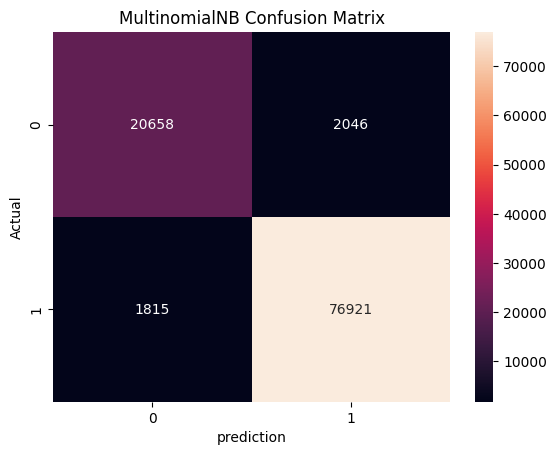

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     91595
           1       0.98      0.99      0.99    314161

    accuracy                           0.98    405756
   macro avg       0.98      0.97      0.97    405756
weighted avg       0.98      0.98      0.98    405756

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     22704
           1       0.97      0.98      0.98     78736

    accuracy                           0.96    101440
   macro avg       0.95      0.94      0.95    101440
weighted avg       0.96      0.96      0.96    101440



In [28]:
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

In [29]:
from sklearn.pipeline import make_pipeline
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())



# make_pipeline : The make_pipeline() function from scikit-learn is used to create a pipeline that chains the two steps together i,e., it takes two steps or process as two parameters.
#                 It helps to create a chain between two separate steps to become a single chained step.

# here first step is--->  CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english')
# first step (as first parameter) : uses the CountVectorizer class from scikit-learn to convert the input data into a matrix of token counts. 
# Specifically, it applies a regular expression tokenizer to extract alphabetic tokens from the input data and removes English stop words.

# here second step is---> LogisticRegression()
# The second step uses the LogisticRegression class from scikit-learn to train a logistic regression model on the output of the CountVectorizer step.

# After executing this command, The resulting pipeline_ls object can be used to fit the model to the training data and predict labels for new data.

In [30]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

# This code uses scikit-learn's train_test_split() function to split the input data df.URL and target variable df.Label into separate training and testing sets. 
# The resulting splits are assigned to four variables: trainX, testX, trainY, and testY.
# The train_test_split() function randomly shuffles the data and assigns a default proportion of the data (25%) to the testing set, with the remaining data assigned to the training set.

In [31]:
pipeline_ls.fit(trainX,trainY)

# here we can observe the working of pipeline object that we created in the above command.

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [32]:
pipeline_ls.score(testX,testY) 

# The score() method calculates the mean accuracy of the model on the input data and target variable provided, which in this case are testX and testY, respectively

0.96414009574208

In [33]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

# This code uses the pickle.dump() function to save the 'pipeline_ls' object as a binary file on the local file system, with the file name 'phishing.pkl'.
# The pickle.dump() function is used to serialize the pipeline_ls object, which means converting the object into a binary format that can be stored on disk or transmitted over a network. 
# The serialized object can later be deserialized (i.e., loaded) using the pickle.load() function.(given below).


# In simple words, pickle file are used as trained model , which can be utilize without training again and again by deserializing the saved pickle file

In [34]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.96414009574208


In [35]:
# do some predictions at last

predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','mail.biockchine.duckdns.org/','robiinhiiod-login.gitbook.io/','www.app-itau-safe.com/',
               'fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','learn.microsoft.com/en-us/training/','bit.ly/ticket-425-97','shortenworld.com/?gclid=Cj0KCQjwocShBhCOARIsAFVYq0i5Ffxk7CZAKikTEE129vFVK8515l_m244TM3Q821gsIRjwCwD8jbsaAvgxEALw_wcB','github.com/taruntiwarihp/Projects_DS/blob/master/Phishing%20Site%20URLs%20Prediction/Phishing%20Site%20URLs%20.ipynb','in.linkedin.com/',
                'codingclub.tech/offer?c=NVDMI&open=coding-mafia','www.whatsapp.com/','www.facebook.com/','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']

loaded_model = pickle.load(open('phishing.pkl', 'rb')) # deserialize the pickle file to do some predictions
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'good']


In [36]:
# dumping into joblib file
import joblib
joblib.dump(pipeline_ls,"phishing.joblib")

# joblib is a Python library that provides tools for efficient serialization and deserialization of Python objects, especially NumPy arrays. 
# It is similar to the pickle module, but is optimized for larger data sets and includes support for parallel processing.
# The resulting file can later be loaded into memory using the joblib.load() function as same as pickle files.
# The joblib library is commonly used in machine learning applications to save and load trained models, as well as to cache the results of expensive computations to speed up subsequent executions of a program.

['phishing.joblib']